# TESLA 9-cell Cavity



In [1]:
# Useful for debugging
%load_ext autoreload
%autoreload 2

import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'

In [2]:
from impact import Impact

ifile1 =  '../templates/tesla_9cell_cavity/ImpactT-1d.in'
ifile2 = '../templates/tesla_9cell_cavity/ImpactT-2d.in'
os.path.exists(ifile1), os.path.exists(ifile2)

(True, True)

In [3]:
# calculate gamma*beta
mec2 = 0.51099895000e6 # eV
Etot = 10e6 #eV
gamma = Etot/mec2
GB = np.sqrt(gamma**2 -1)
GB

GB, np.sqrt(Etot**2 - mec2**2)

(19.54394518727907, 9986935.46955716)

CPU times: user 149 ms, sys: 34.3 ms, total: 183 ms
Wall time: 17.2 s


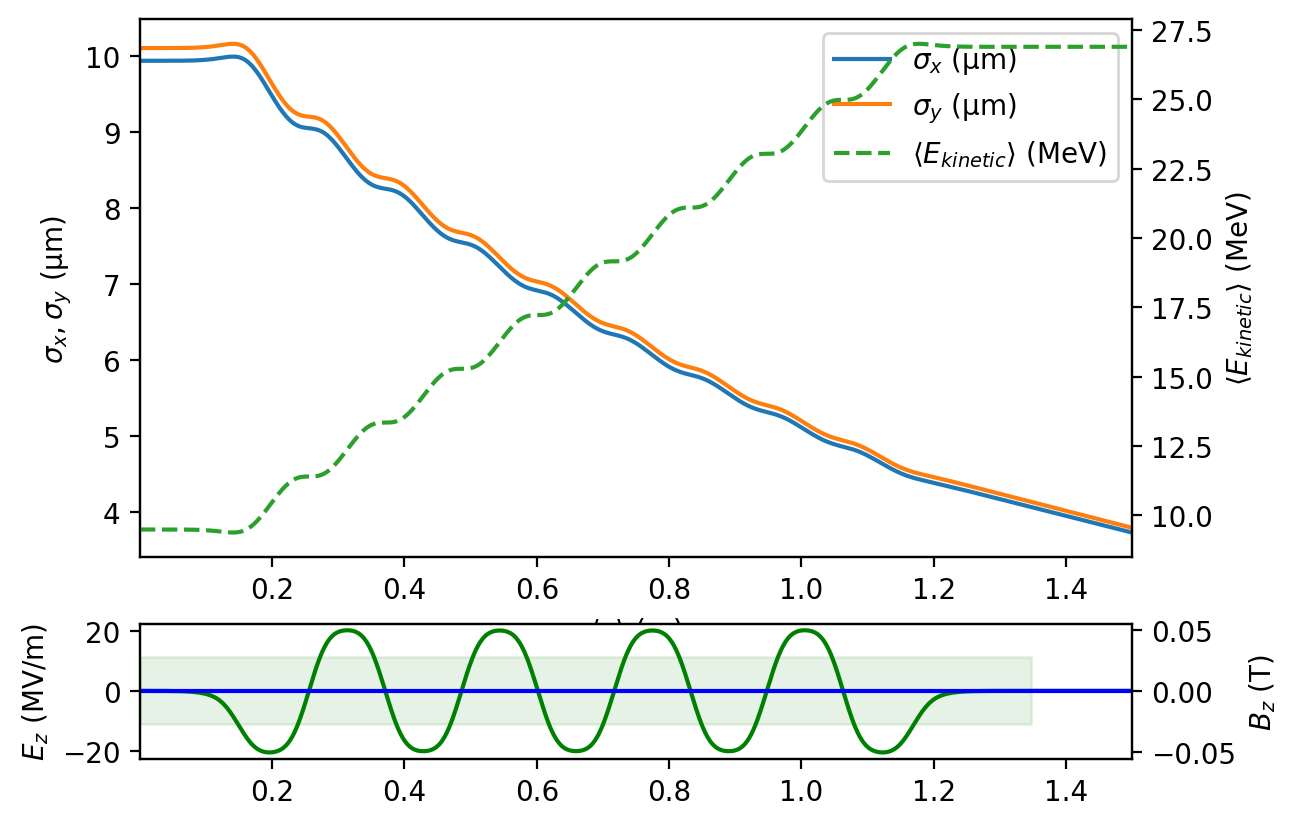

In [4]:
%%time
I1 = Impact(ifile1)
I1.run()
I1.plot(y2='mean_kinetic_energy')

CPU times: user 582 ms, sys: 52.7 ms, total: 634 ms
Wall time: 3.5 s


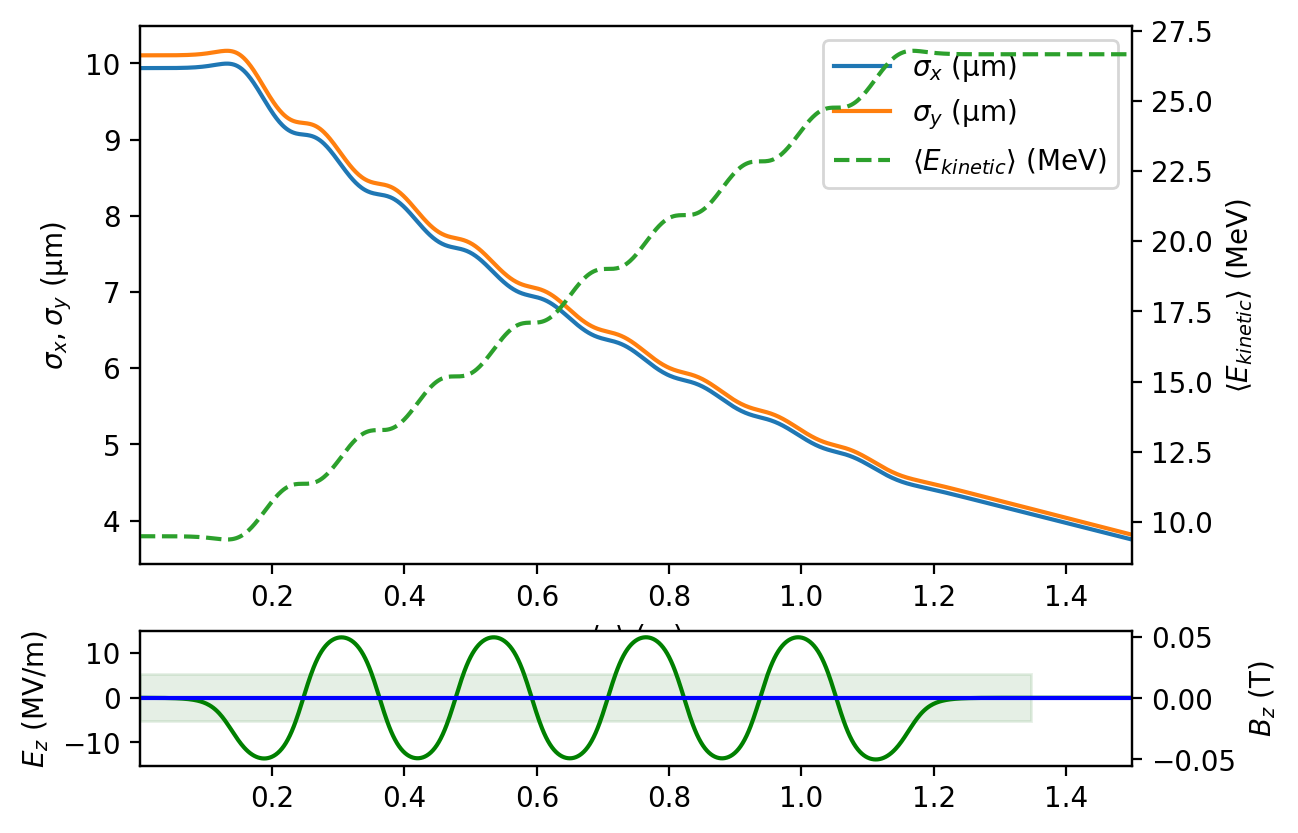

In [5]:
%%time
I2 = Impact(ifile2)
I2.run()
I2.plot(y2='mean_kinetic_energy')

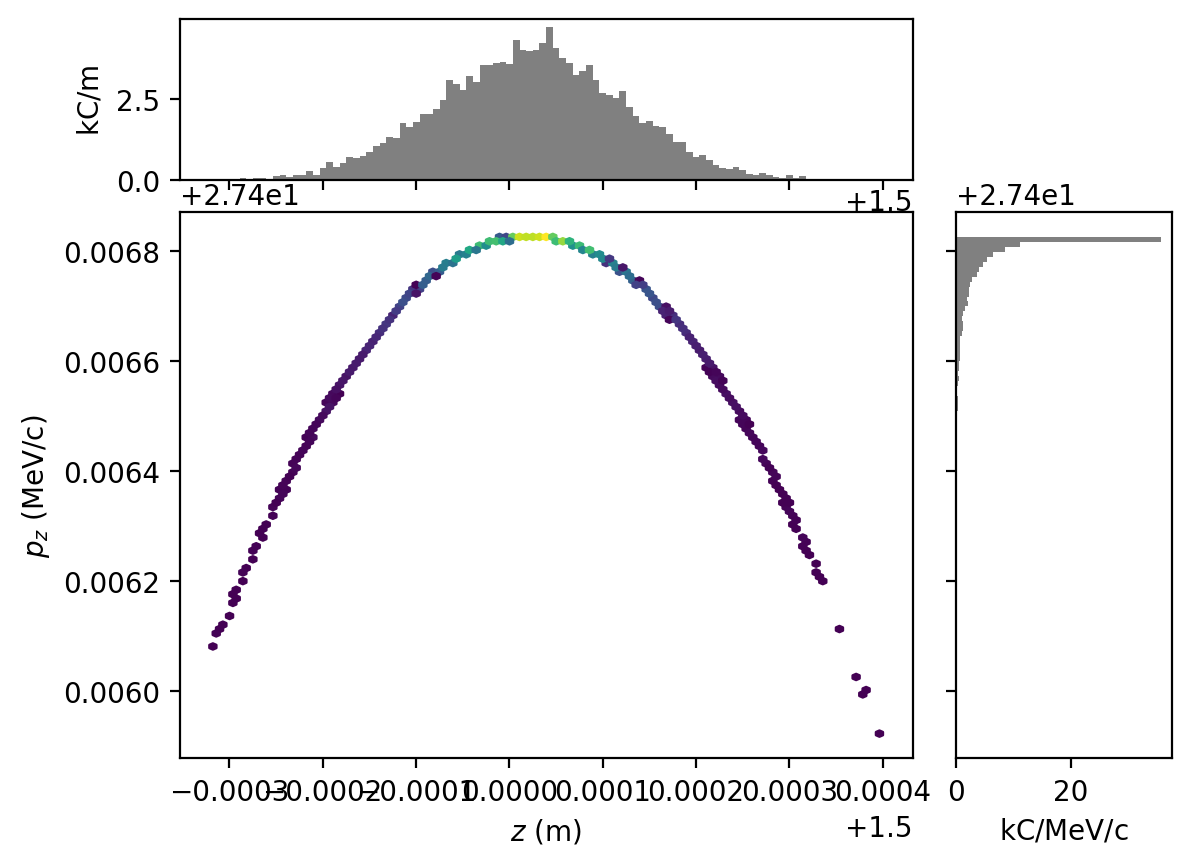

In [6]:
I1.particles['final_particles'].plot('z', 'pz', bins=100)

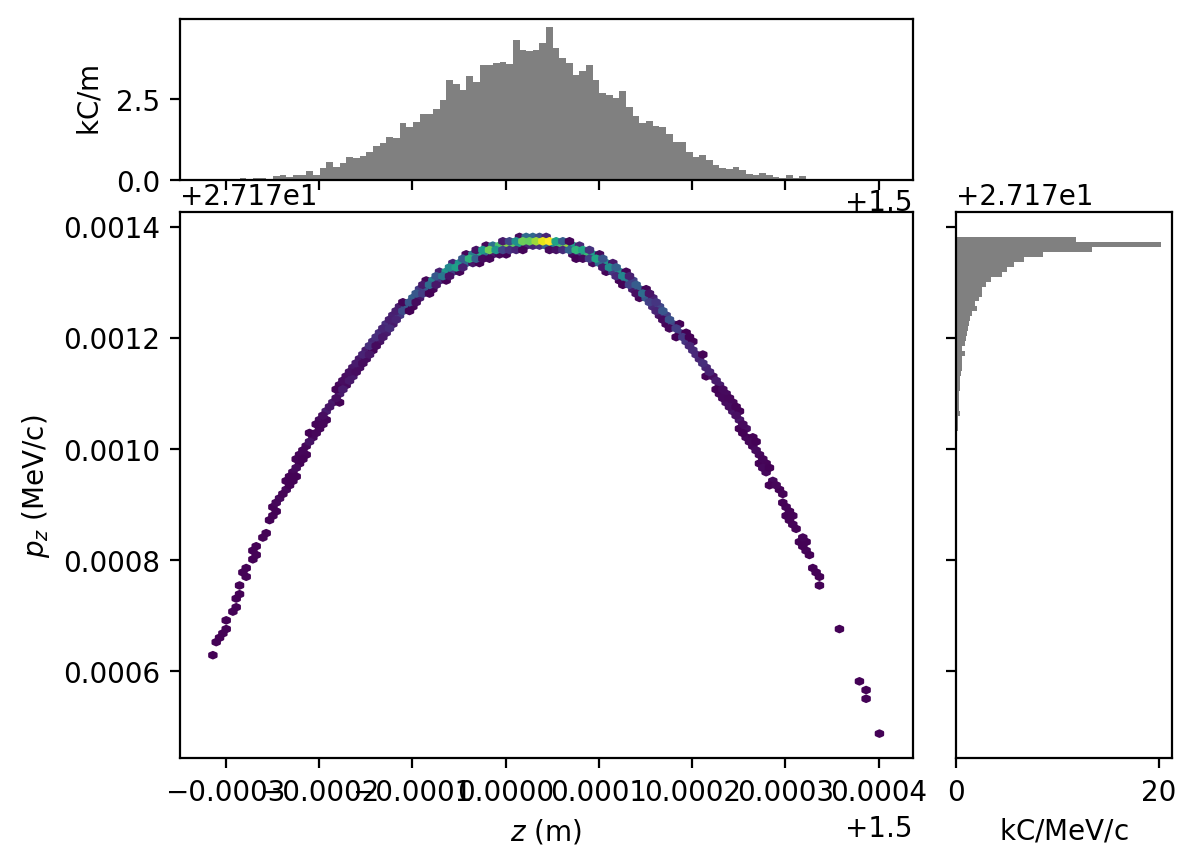

In [7]:
I2.particles['final_particles'].plot('z', 'pz', bins=100)

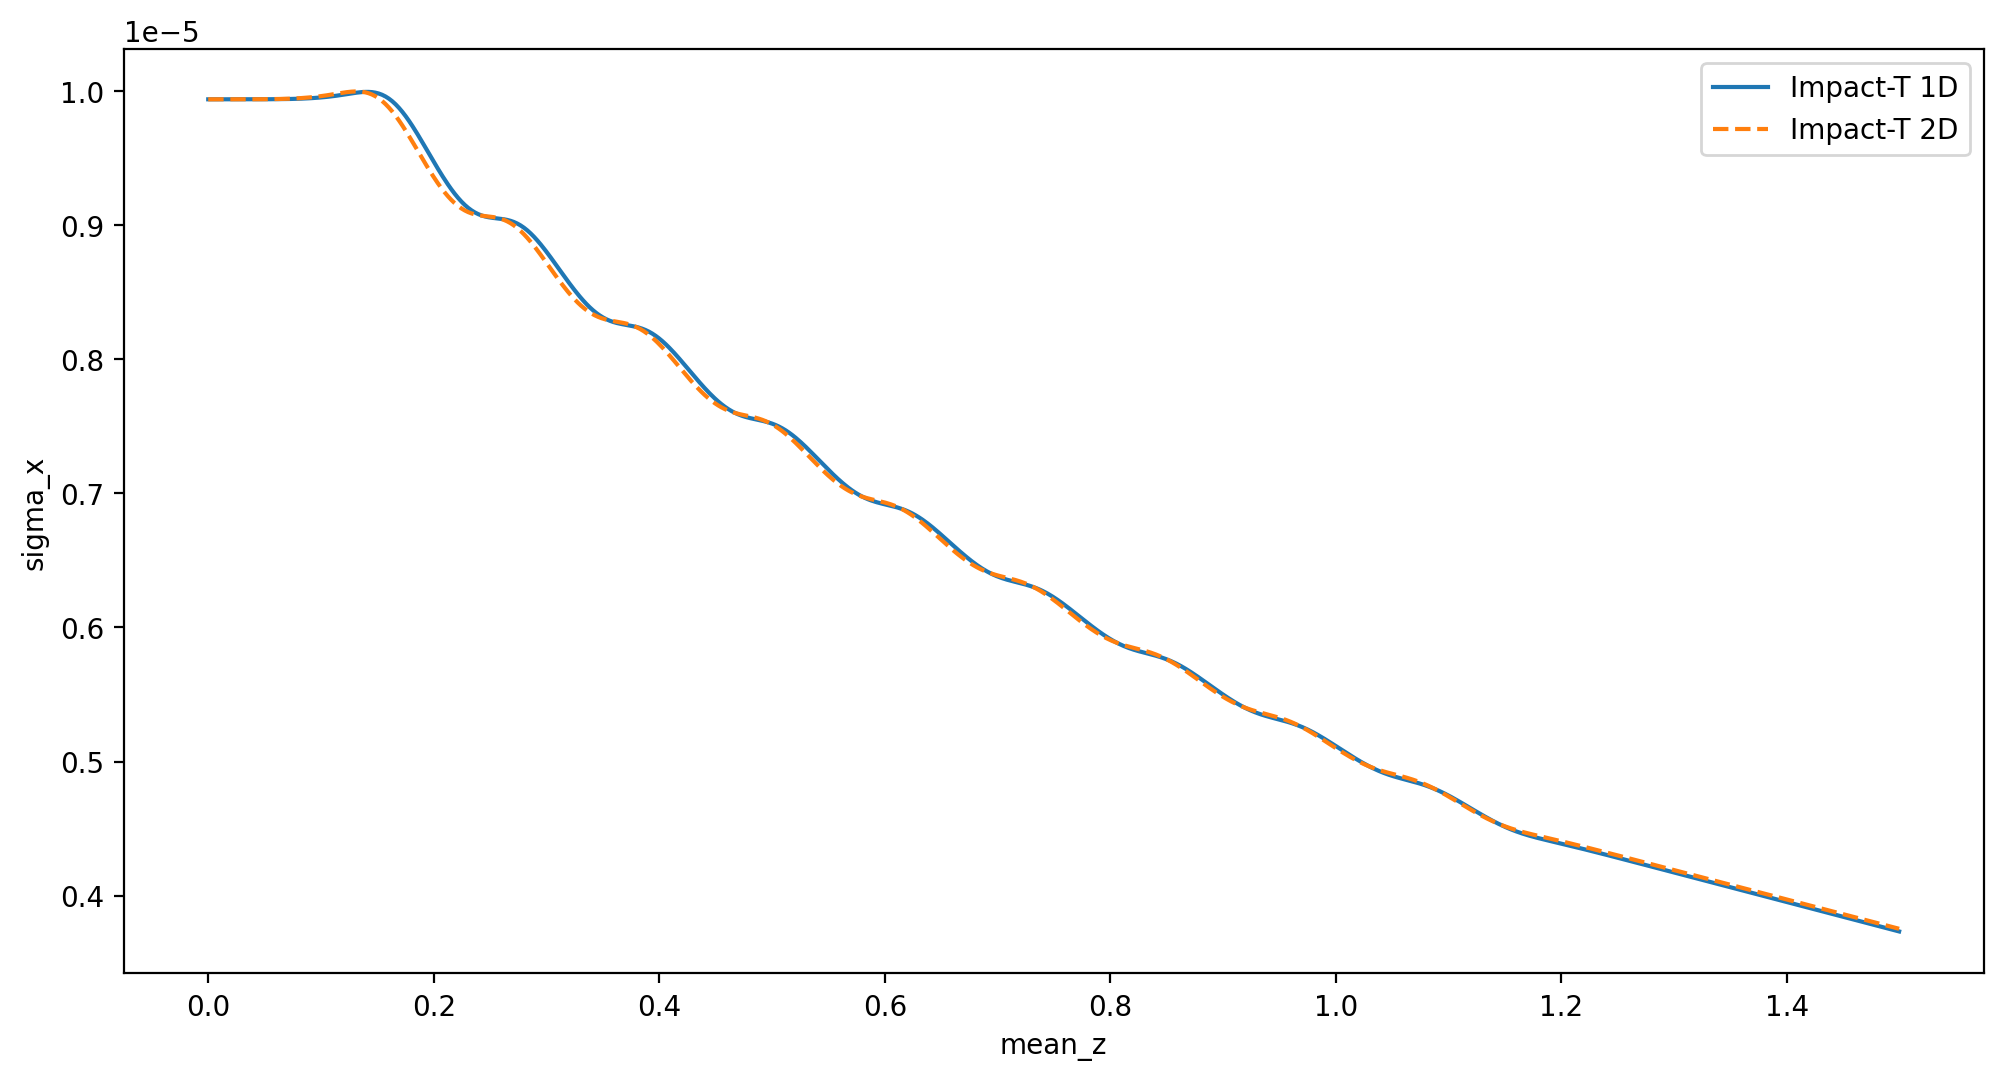

In [8]:
#ky = 'mean_kinetic_energy'
def compare(ky = 'sigma_x', kx = 'mean_z'):

    fig, ax = plt.subplots(figsize=(12,6))
    ax.plot(I1.stat(kx), I1.stat(ky), label='Impact-T 1D')
    ax.plot(I2.stat(kx), I2.stat(ky), label='Impact-T 2D', linestyle='--')
    ax.legend()
    #ax.set_xlim(0,2)
    
    ax.set_xlabel(kx)
    ax.set_ylabel(ky)
compare()    

# Use Impact's built-in Gaussian particle generator

In [9]:
I = Impact(ifile1, verbose=False)
#I.header['Np'] = 100000
#I.header['Nx'] = 32
#I.header['Ny'] = 32
#I.header['Nz'] = 32
I.header['Dt'] = 1e-12

#I.ele['cavity9']['rf_field_scale']= 32e6
#I.ele['cavity9']['theta0_deg'] =  29.37652048194741

I.total_charge = 0 # Turn SC off
I.verbose=False
print(I)
I.run()
I.particles['final_particles']['sigma_x']/1e-6


================ Impact-T Summary ================    
10000 particles
1 bunch of electrons
total charge: 0.0 pC
Distribution type: gauss3
Free space start
Processor domain: 1 x 1 = 1 CPUs
Space charge grid: 32 x 32 x 32
Maximum time steps: 1000000
Reference Frequency: 1300000000.0 Hz
Initial reference time: 0.0 s
Simulation starting from the beginning
Impact-T configured in /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpk_oj4nby


3.731960809671403

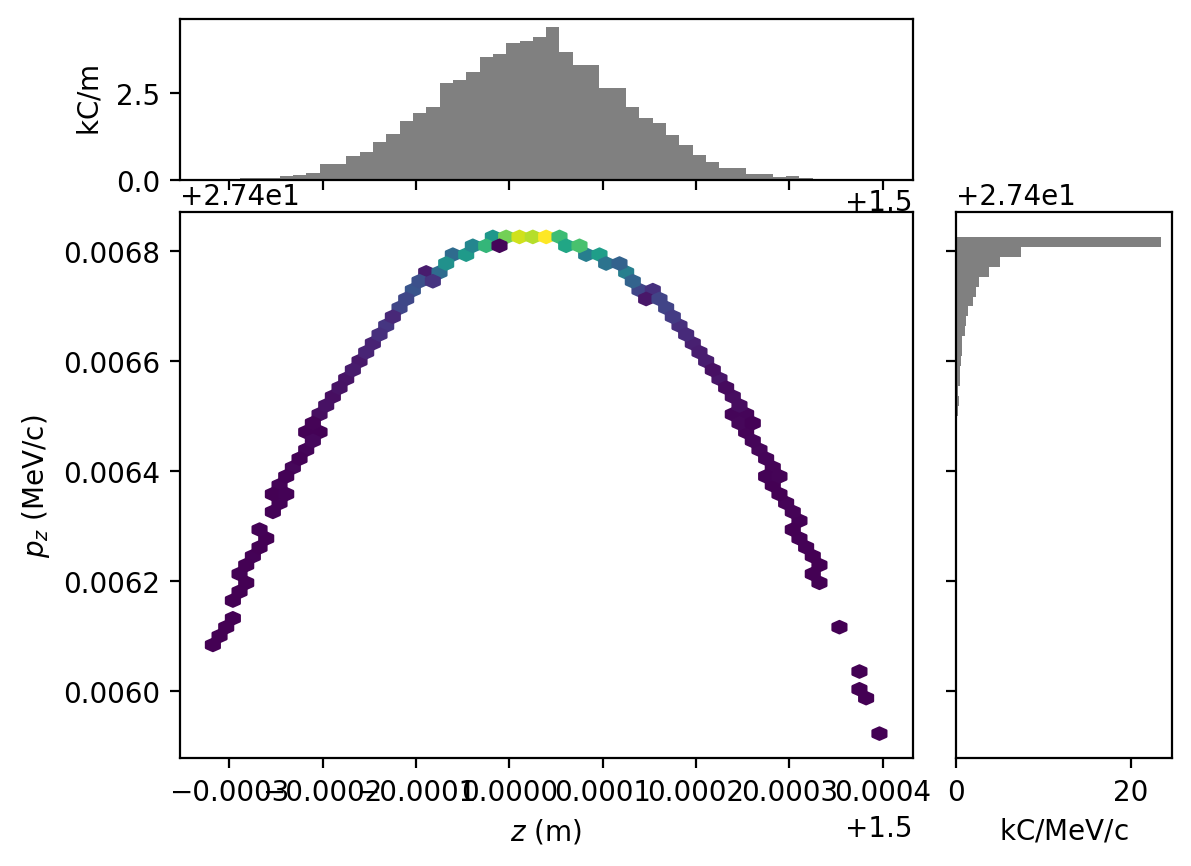

In [10]:
I.particles['final_particles'].plot('z', 'pz')

In [11]:
I.lattice

[{'description': 'name:cavity9',
  'original': '1.347 0 0  105 0 32e6 1.3e9 229.8241496412331 9 0 0.0 0.0 0.0 0.0 0.0 0.0 /!name:cavity9',
  'L': 1.347,
  'type': 'solrf',
  'zedge': 0.0,
  'rf_field_scale': 32000000.0,
  'rf_frequency': 1300000000.0,
  'theta0_deg': 229.8241496412331,
  'filename': 'rfdata9',
  'radius': 0.0,
  'x_offset': 0.0,
  'y_offset': 0.0,
  'x_rotation': 0.0,
  'y_rotation': 0.0,
  'z_rotation': 0.0,
  'solenoid_field_scale': 0.0,
  's': 1.347,
  'name': 'cavity9'},
 {'description': 'name:stop_1',
  'original': '0 0 0 -99 0 0.0 1.5 /!name:stop_1',
  'type': 'stop',
  's': 1.5,
  'name': 'stop_1'}]

# Autophase

In [12]:
from impact.autophase import autophase

from pmd_beamphysics import single_particle

P0 = single_particle(pz=10e6, z=1e-15)

autophase(I2, ele_name='cavity9', initial_particles=P0, metric='mean_kinetic_energy', verbose=True)

Copied initial Impact object. 
Phasing cavity9 by changing theta0_deg
Bounds: 0.0, 1.347 m
Default brent2 algorithm
Phase: 180, 16.998227975214004 MeV
Phase: 180, 16.998227975214004 MeV
Phase: 42.49224000000004, 0.0 M
Phase: 180, 16.998227975214004 MeV
Phase: 42.49223094384001, 0.0 M
Phase: 42.49223999999998, 0.0 M
Phase: 222.49223547192, 25.442029397369534 MeV
Phase: 291.2461137423474, 21.238389337448673 MeV
Phase: 243.7817825076153, 26.67725309641637 MeV
Phase: 244.6923794470155, 26.678029806579133 MeV
Phase: 244.40270047418736, 26.678252484702742 MeV
Phase: 244.40037613191828, 26.678252498701642 MeV
Phase: 244.4006205323044, 26.67825249854837 MeV
Phase: 244.40013173153216, 26.67825249854837 MeV
Set Phase: 244.40037613191828


244.40037613191828

In [13]:
I.run()

In [14]:
I.particles['final_particles']['mean_energy']/1e6, I.particles['final_particles']['sigma_x']/1e-6

(27.4115271576144, 3.731960809671403)

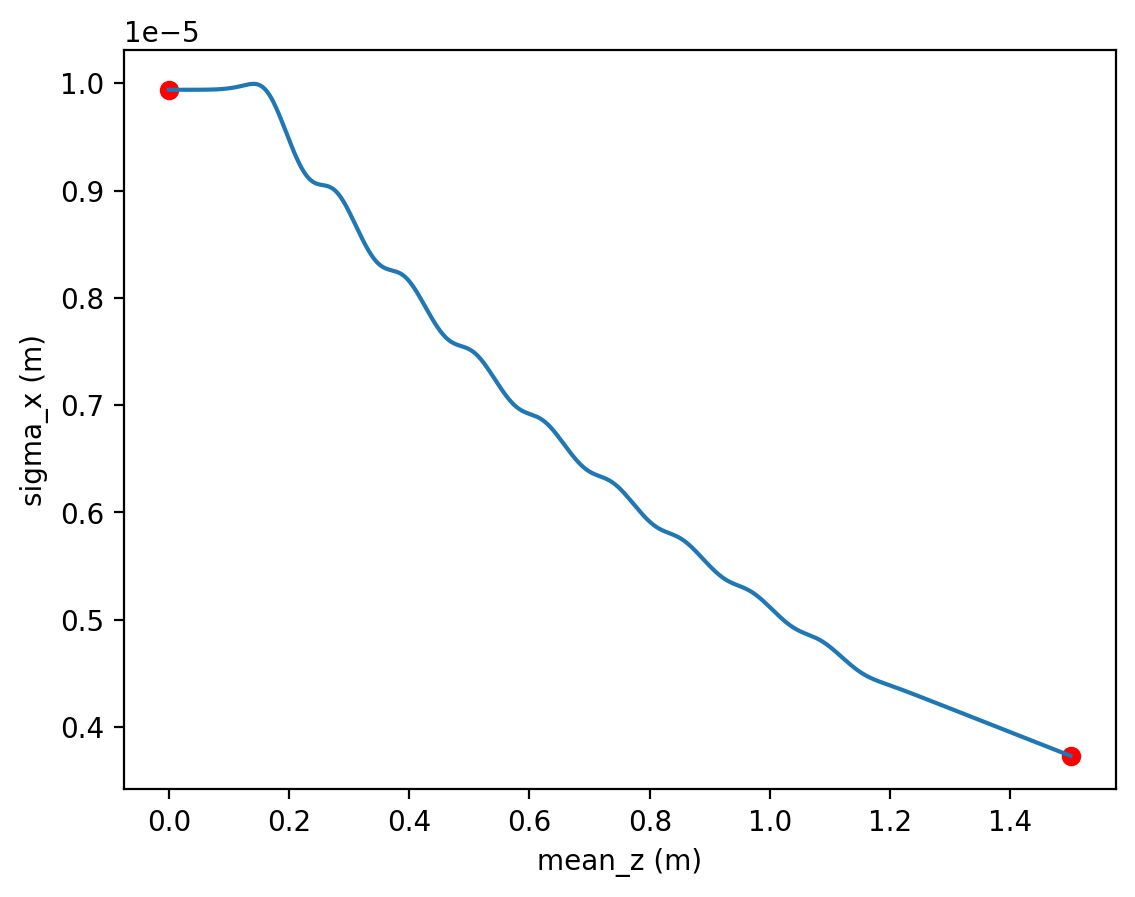

In [15]:
# Compare these. 
key1 = 'mean_z'
key2 = 'sigma_x'
units1 = str(I.units(key1))
units2 = str(I.units(key2))
plt.xlabel(key1+f' ({units1})')
plt.ylabel(key2+f' ({units2})')
plt.plot(I.stat(key1), I.stat(key2))
plt.scatter(
    [I.particles[name][key1] for name in I.particles], 
    [I.particles[name][key2] for name in I.particles], color='red')

In [16]:
I.output['stats'].keys()

dict_keys(['t', 'mean_z', 'moment4_x', 'moment4_y', 'moment4_z', 'mean_y', 'sigma_y', 'norm_emit_y', 'mean_x', 'sigma_x', 'norm_emit_x', 'sigma_z', 'norm_emit_z', 'loadbalance_min_n_particle', 'loadbalance_max_n_particle', 'n_particle', 'moment3_x', 'moment3_y', 'moment3_z', 'mean_gamma', 'mean_beta', 'max_r', 'sigma_gamma', 'max_amplitude_x', 'max_amplitude_y', 'max_amplitude_z', 'moment4_px', 'moment4_py', 'moment4_pz', 'mean_py', 'sigma_py', 'cov_y__py', 'mean_px', 'sigma_px', 'cov_x__px', 'mean_pz', 'sigma_pz', 'cov_z__pz', 'moment3_px', 'moment3_py', 'moment3_pz', 'mean_kinetic_energy', 'max_amplitude_px', 'max_amplitude_py', 'max_amplitude_pz'])

In [17]:
PI = I.particles['initial_particles']
PF = I.particles['final_particles']

In [18]:
PI['mean_pz']

9986935.46956785

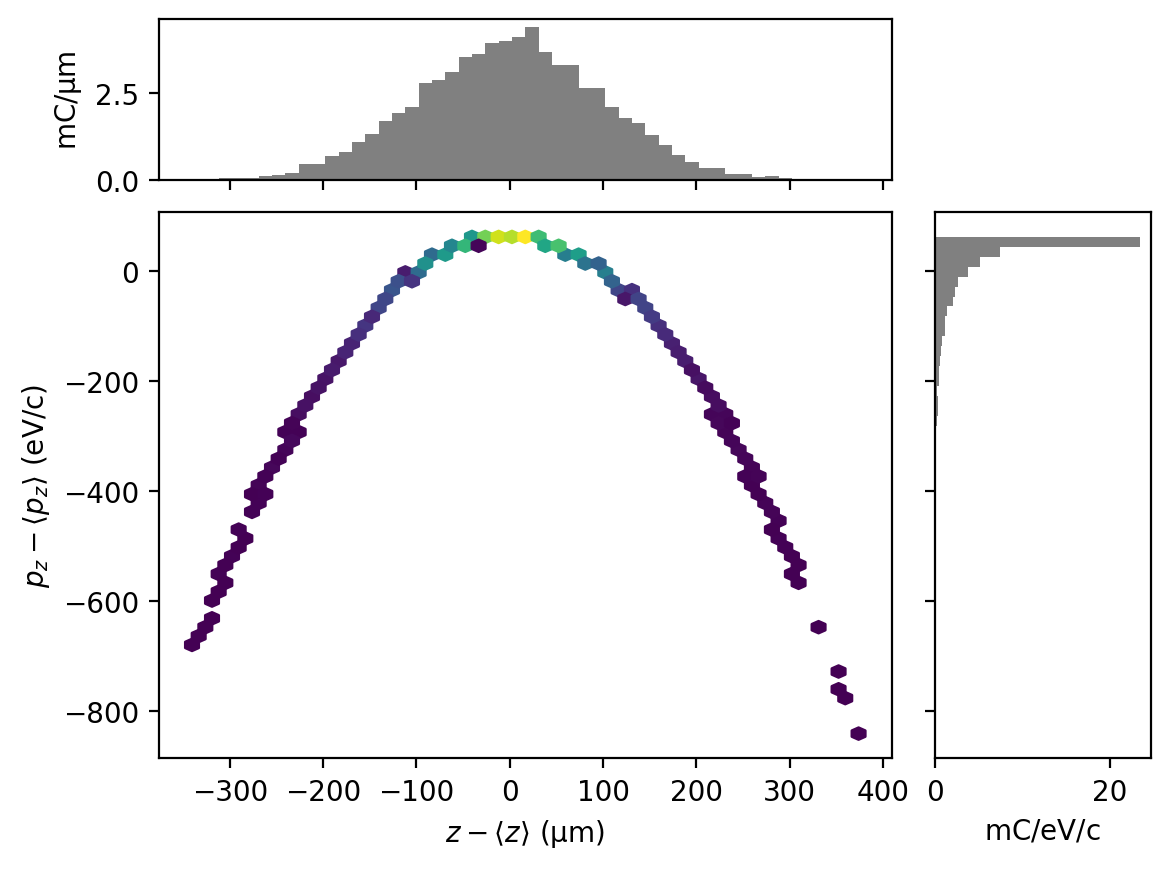

In [19]:
PF.plot('delta_z', 'delta_pz')

# Make particles in distgen

In [20]:
from distgen import Generator

YAML="""
n_particle: 10000
random_type: hammersley
start:
  tstart:
    units: sec
    value: 0
  type: time
total_charge:
  units: nC
  value: 1
r_dist:
  sigma_xy:
    units: mm
    value: .01
  type: radial_gaussian
z_dist:
  avg_z:
    units: mm
    value: 0
  sigma_z:
    units: mm
    value: 0.1
  type: gaussian
  

transforms:
  setPz:
    type: set_avg pz
    avg_pz: 
      value: 99.99869439159244
      units: MeV/c
  
"""
G = Generator(YAML)
G.run()
P = G.particles


In [21]:
I2 = I.copy()
I2.initial_particles = P
I2.configure()
I2.total_charge = 0 # or: P['charge']
I2.verbose = True
I2.run()
PF2 = I2.particles['final_particles']

Running Impact-T in /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpxy187ei7
/Users/chrisonian/Code/Impact/IMPACT-T/build/ImpactTexe
writing 10000 particles to /var/folders/2f/l5_mybzs30j4qqvyj98w1_nw0000gn/T/tmpxy187ei7/partcl.data
Normal start with at time 0.0 s
Normal start: Replaced Np with 10000 according to initial particles
Normal start: Replaced Tini with 0.0 according to initial particles
Normal start: Replaced Flagimg with 0 according to initial particles
Changing particle offset factor zmu2 to 0
 !-----------------------------------------------------------
 ! IMPACT-T Parallel Beam Dynamics Tracking Code: 2.1 beta version
 ! Copyright of The Regents of the University of California
 !-----------------------------------------------------------
 nblem:            2           2
 pass setting up lattice...
 check randomness:            0  0.30440529327431320     
 avgpts, jlow, and jhigh:        10000           1       10000
 sumx1,sumy1:    9.5636796008588550E-021  -1.109260

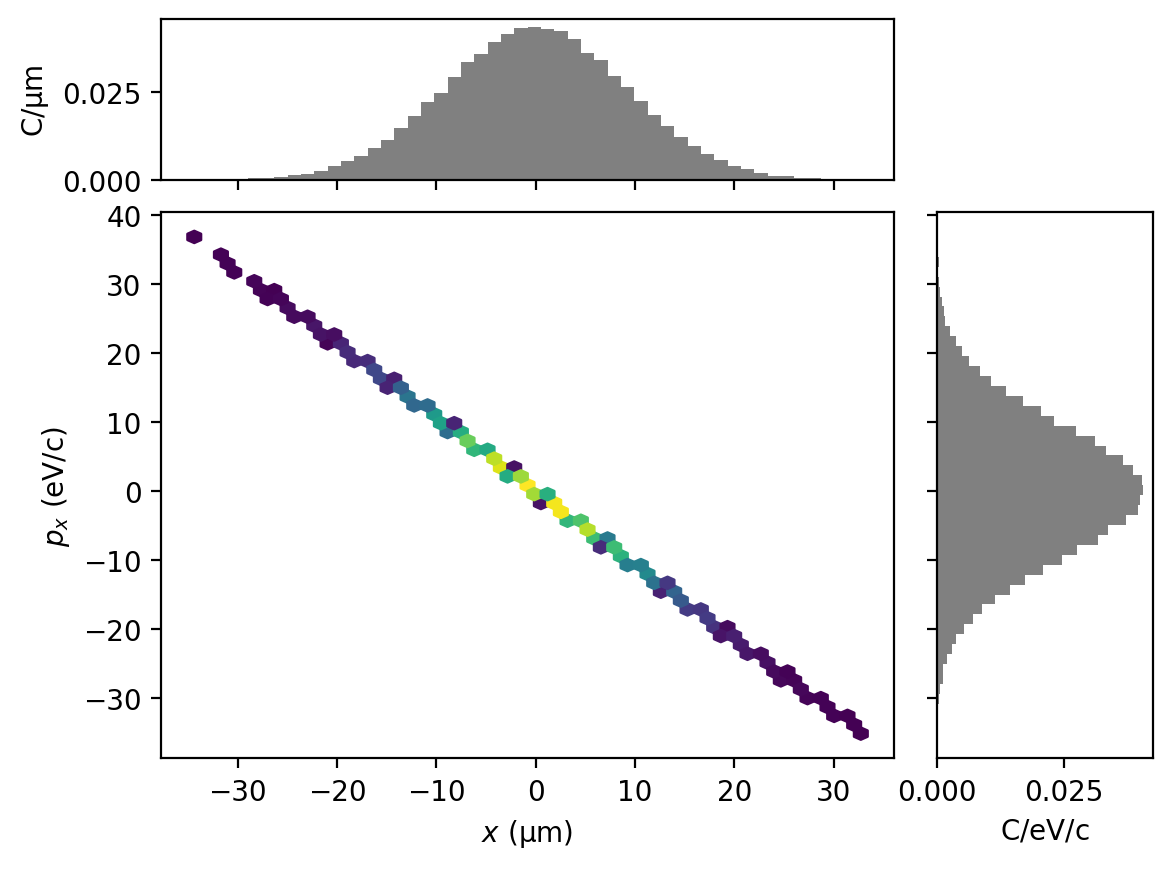

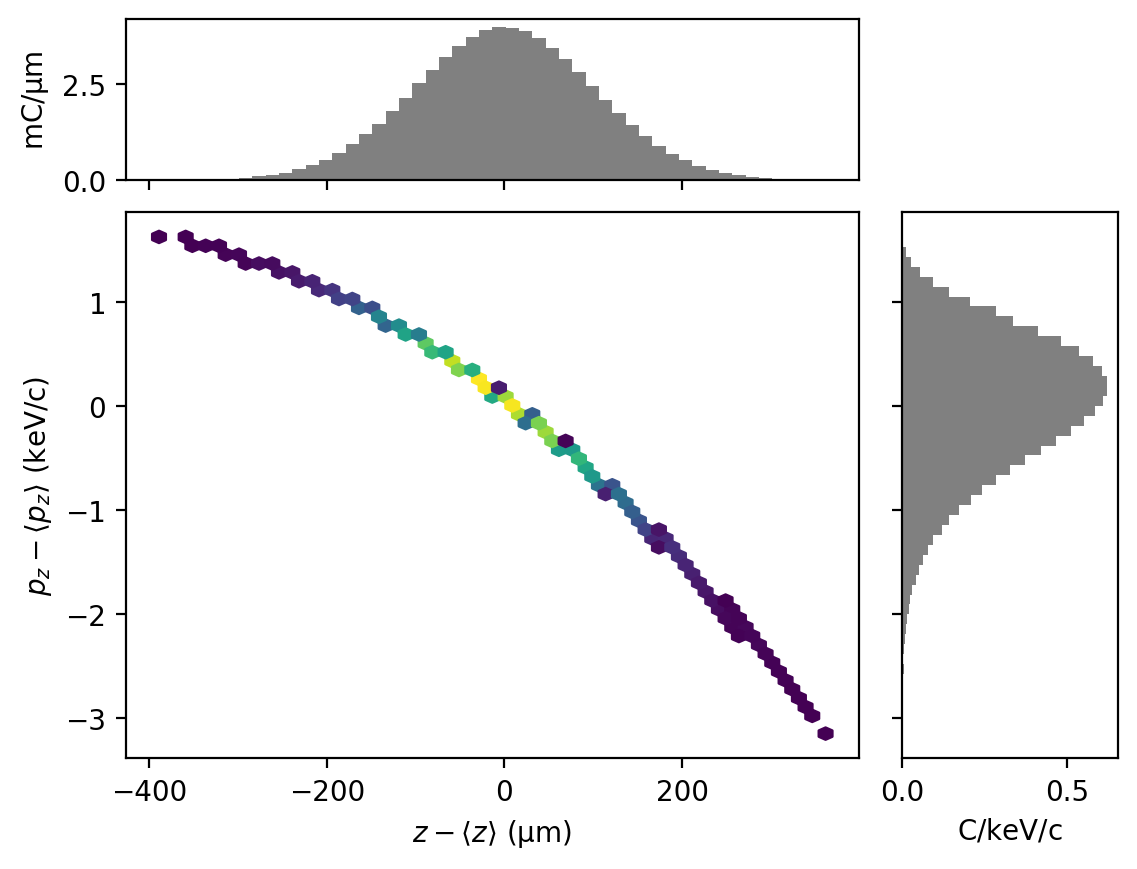

In [22]:
PF2.plot('x', 'px')
PF2.plot('delta_z', 'delta_pz')

# Compare

In [23]:
# for k in ['x', 'px', 'z', 'pz']:
#     plt.hist(PF[k], density=True, bins=100, label='Impact-T generator', alpha=0.5)
#     plt.hist(PF2[k], density=True, bins=100, label='Distgen generator', alpha=0.5)
#     plt.xlabel(k)
#     plt.legend()
#     plt.show()